# Inferential Statistics

Inferential statistics is to reach to a conclusion on the basis of evidence and reasoning gained from the sample data that is generalized for the population. 

Inferential statistics considers that there will be some sampling errors, which means the sample that we have drawn from the population may not be perfectly representing the population.

Inferential statistics include:
- Estimation 
- Hypothesis testing


What is the difference between a sample and population?

A population is a collection of all the events or observations about which we want want to gain knowledge. But its size can be so huge that it is not always convenient or feasible to analyze every event of this observation. In such a scenario, we take a subset that well defines the population that we want to analyze. We refer to this subset as a sample of the population.


# Descriptive Statistics And Inferential Statistics

Descriptive statistics provide the summary of the data numerically or graphically. It only helps us to understand the data that we have, but we cannot use these results to form a conclusion that is generalized for the whole population.


With inferential statistics, we try to build a conclusion that is applicable for the whole population. But inferential statistics is limited by two main conditions:

- Whether the sample data that we have actually represents the population or not
- Whether the calculated assumptions that we form to make the sample data represent the population are correct or not



In Julia, we have various packages, which are used for inferential statistics. One such package is Distributions.jl, which provides functions related to probabilistic distributions. Distributions.jl covers the following statistical methods:

- Properties of distribution – mean, variance, skewness, and kurtosis (moment) and entropy
- Probability density/mass functions
- Characteristic functions
- Maximum likelihood estimation 
- Maximum-A-Posteriori (MAP) probability estimate


# 1.  Installation


Distributions.jl is a registered Julia package so it can be added using: julia> Pkg.add("Distributions")

In [83]:
#using Pkg
#Pkg.add("Distributions")

# Understanding the Sampling Distribution

The sampling distribution is the likelihood of gathering every possible statistic from a sample of a population that is taken randomly. Useful information can be derived using the sampling distribution without the complete knowledge of the population.

# Understanding the normal distribution


The normal distribution is the core of inferential statistics. It is like a bell curve (also called a Gaussian curve). Most of the complex processes can be defined by the normal distribution.


Let's see what a normal distribution looks like. First, we will import the necessary packages. We are including RDatasets now, but will be using it later:

In [84]:
using DataFrames
using RDatasets
using Distributions
using Gadfly

In [85]:
fieldnames(Normal)

(:μ, :σ)

Here, we can see that the Normal function is in the Distributions package and has the features Univariate and Continuous. The constructor of the normal() function accepts two parameters:
- Mean (μ)
- Standard deviation (σ)


Let's instantiate a normal distribution. We will keep the mean (μ) as 1.0 and the standard deviation (σ) as 3.0:

In [86]:
dist1=Normal(1.0,3.0)

Normal{Float64}(μ=1.0, σ=3.0)

In [87]:
params(dist1)

(1.0, 3.0)

We can check the mean and standard deviation that we have kept:



note: to get symbol \sigma(presstab)

In [88]:
dist1.μ

1.0

In [89]:
dist1.σ

3.0

Using this normal distribution object, we can now create a distribution using a random function:

In [90]:
x = rand(dist1, 1000)

1000-element Array{Float64,1}:
  2.2372742856458325
  3.3526551880196127
 -4.793269137924257
 -2.4642793943549197
  2.0257263581838076
  3.5016638377863765
 -3.8807185689879873
 -0.06089813438429936
  1.6431436369596872
 -2.7658598468467246
  0.38724038444346
  3.6664670166715654
  1.163458779375157
  ⋮
 -1.743963430130476
 -6.562783549425613
 -1.4189710304369285
  1.6673768367172124
 -2.1795546151925436
  5.718938878638639
  4.414288166269234
  1.9039863672558073
  4.9357131015222855
 -1.0411988903095795
 -3.0739656498185566
 -2.882281110884305

To better understand the function, let's plot a histogram using Gadfly:

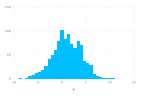

In [91]:
plot(x=rand(dist1, 1000), Geom.histogram(bincount = 30))

# Parameter estimation:

This is used to find out by what kind of distribution it is best described. We can use the fit function for this:

In [92]:
fit(Normal,x)

Normal{Float64}(μ=0.8904899361586235, σ=3.1299763292850638)

# Type hierarchy in Distributions.jl

The functions provided in Distributions.jl follow a hierarchy. Let's go through it to understand the capabilities of the package.


The kinds of samples that can be drawn are defined by the two parameter types:


- VariateForm:
        - Univariate: Scalar number
        - Multivariate: Numeric vector 
        - Matrixvariate: Numeric matrix

- ValueSupport:
        - Discrete: Int
        - Continuous: Float64

We can extract the information about the sample that the Sampleable object generates. An array can contain multiple samples depending on the variate form. 

We can use various functions to get the information (let's assume sampobj is the sampleable object):

- length(sampobj): As the name suggests, it gives the length of the sample, which is 1 when the object is Univariate
- size(sampobj): This returns the shape of the sample
- nsamples(sampobj, X): This returns the number of samples that are in X eltype(sampobj): This returns the default type of elements in the sample 
- rand(sampobj, x): This returns x number of samples taken from the sample:
                - For sampobj=univariate, a vector of length x is returned
                - For sampobj=multivariate, a matrix of x columns is returned
                - For sampobj=matrix-variate, an array of a sample matrix is returned


# Univariate distributions

The distributions where each sample is scalar are Univariate distributions. We can categorize them further into two distributions based on the values they support:


- Univariate Continuous Distribution 
- Univariate Discrete Distribution


# Retrieving parameters
- params(distributionX): This will return a tuple of parameters 
- succprob(distributionX): This returns the probability of success 
- failprob(distributionX): This returns the probability of failure 
- dof(distributionX): This returns the degree of freedom 
- ncategories(distributionX): This returns the number of categories 
- ntrials(distributionX): This returns the number of trials



# Statistical functions
Common statistical functions such as mean(), median(), mode(), std(), var(), and so on, are applicable on these distributions.

# Evaluation of probability

In addition to various statistical functions, Julia also provides functions for evaluating probability:

- pdf(distributionX): pdf refers to the probability density function. It returns the probability vector of distributionX. A range of values can also be provided as the second argument to the function in the form of a:b.
- cdf(distributionX): cdf refers to the cumulative distribution function.
- insupport(distributionX,x): This supports function returns if the distributionX, x is in support or not.

# Sampling in Univariate distributions

We have previously discussed random number generation. It can also be used to draw a sample from a distribution:

    rand(distributionX)


This will draw a single sample from distributionX. It uses multiple dispatch and we can provide other arguments depending on our needs:
   

    rand(distributionX,n)

This will return from the distributionX a vector of n independent samples.

# Understanding Discrete Univariate distributions and types

Discrete Univariate Distribution is the super type of these distributions and the sample drawn from such distributions is an integer.


# 1. Bernoulli distribution

Bernoulli distribution is a discrete distribution. It has two possible outcomes, let's say these are n=0 and n=1. Here, if we take n=1 as success and its probability as p, then n=0 is failure and has the probability q=1-p where 0<p<1.

Bernoulli distribution is implemented as follows:

In [93]:
p=0.7

0.7

In [94]:
Bernoulli(p)

Bernoulli{Float64}(p=0.7)

Here, p is the success rate (probability).

# 2. Binomial distribution

Binomial distribution is another discrete probability distribution. It is given by Pp(n|N), which is obtaining n number of successes out of N Bernoulli trials. After a sequence of independent trials, the number of successes obtained is the binomial distribution:

In [95]:
using Distributions

In [96]:
Binomial()

Binomial{Float64}(n=1, p=0.5)

This is a Binomial distribution with number of trials=1 and success rate, p=0.5:


In [97]:
n=5

5

In [98]:
Binomial(n)

Binomial{Float64}(n=5, p=0.5)

Here we have specified the number of trials=5. The success rate remains as default:


In [99]:
p=0.3

0.3

In [100]:
Binomial(n,p)

Binomial{Float64}(n=5, p=0.3)

We can also define the success rate. So, this will return a distribution with the number of trials=5 and success rate, p=0.3.

# Continuous distributions

Continuous Univariate Distribution is the super type of all the continuous univariate distributions, and each sample drawn from a continuous univariate distribution is of type Float64.


# 1. Cauchy distribution

Cauchy distribution is also called Lorentz distribution. It is a continuous distribution that describes the resonance behavior:


In [101]:
Cauchy()

Cauchy{Float64}(μ=0.0, σ=1.0)

This gives the standard Cauchy distribution (location = 0.0, scale = 1.0):


     Cauchy(u,s)

In [102]:
Cauchy(2,1)

Cauchy{Float64}(μ=2.0, σ=1.0)

# 2. Chi distribution

Chi distribution with k degrees of freedom is the distribution formed by the square root of a chi-squared random variable, which is the sum of squares of k independent variables that are normally distributed.

In Julia, it is implemented as follows:

In [103]:
k=2

2

In [104]:
Chi(k)

Chi{Float64}(ν=2.0)

This will form a Chi distribution with k degrees of freedom

It is used to yield the correction factor in the unbiased estimation of the standard deviation
of the normal distribution by dividing by the mean of the chi distribution.

# 3. Chi-square distribution

Chi-square distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables.

In Julia, it is implemented as follows:

In [105]:
k=2

2

In [106]:
Chisq(k)

Chisq{Float64}(ν=2.0)

Here, k is the degree of freedom.

The significance of Chi-square distribution commonly used in chi-squared tests is:
- It is used to get the goodness of fit of an observed distribution
- Of a normal distribution, it is used to get the confidence interval estimation for a population standard deviation from a sample standard deviation
- It is also used to get the independence of classification criteria of qualitative data


#  Truncated distributions

Sometimes it is required to limit a distribution within a specific domain or range and the result from restricting a distribution is called truncated distribution. These are useful when we can only record the events in a specified range or when a threshold is given:

This is the truncated distribution when it is restricted between two constants. 

1. The nontruncated case: −∞ = a, b = +∞.
2. The lower truncated case: −∞ < a, b = +∞.
3. The upper truncated case: −∞ = a, b < +∞. 
4. The doubly truncated case: −∞ < a, b < +∞

However, a few statistical functions that are available to Univariate Distributions are available to general Truncated distributions too. The reason for non-availability of those functions is that it gets complex to compute because of the truncation.


# Truncated normal distributions

This is a special type of distribution in which the truncated distribution forms a normal distribution.

It can be made using the dedicated constructor, TruncatedNormal, or by providing the Normal constructor as an argument to the Truncated constructor:


    TruncatedNormal(mu, sigma, l, u)


As this is the normal distribution, the statistical functions that are not available to general truncated distributions are available to truncated normal distributions.

# Understanding multivariate distributions

A multivariate probability distribution is one containing more than one random variable. There may or may not be any correlation among these random variables. A sample drawn from this distribution is a vector.

Distributions.jl has implementations of commonly used multivariate functions—Multinomial, Multivariate Normal, and Dirichlet

Most of the methods available to Univariate distributions are also available to Multivariate distributions.


# 1. Multinomial distribution

This generalizes the binomial distribution. Suppose that over a finite set of size k of a categorical distribution, we take n independent draws.

Let's represent this as : X = X1, X2, ............ Xk.

Then this X represents a multinomial distribution whose every sample is a k-dimensional integer vector that sums to n.

In Julia, it is implemented as follows:


     Multinomial(n, p)

Here, p represents the probability vector and we are creating the distribution with n trials.


# 2. Multivariate normal distribution

This is a multidimensional generalization of the normal distribution:


Reasons why multivariate normal distribution is important:

- Mathematical simplicity: It is easier to work with this distribution
- Multivariate version of the Central Limit Theorem: If we have a collection of random vectors X1, X2,...,Xn that are independent and identically distributed, then the sample mean vector, x ̄x ̄, is going to be approximately multivariate normally distributed for large samples
- It is used in the modeling of many natural phenomena

There are three types of covariances matrices that are implemented:
- Full covariance. 
- Diagonal covariance. 
- Isotropic covariance.

The mean vector is either of an instance of Vector{Float64} or ZeroVector{Float64}.ZeroVector{Float64} is a vector filled with zeros.

A multivariate normal distribution is constructed in the following ways:
- MvNormal(mu, sig): mu refers to mean and sig refers to covariance 
- MvNormal(sig): We are not passing the mean, therefore the mean will be zero 
- MvNormal(d,sig): d refers to the dimension here


# Dirichlet distribution

Dirichlet distribution represents the conjugate prior to the multinomial distribution. This refers to the condition that the posterior distribution is also a Dirichlet distribution if the prior distribution of the multinomial parameters is Dirichlet

This tells us that the Dirichlet is part of the Multivariate family and is a Continuous distribution

There are parameters accepted by the Dirichlet method. This is used as:


    julia> Dirichlet(alpha)

Here alpha is a vector:

    julia> Dirichlet(k, a)

In this, a is a positive scalar.

# Understanding matrixvariate distributions

This is a distribution from which any sample drawn is of type matrix. Many of the methods that can be used with Univariate and Multivariate distributions can be used with Matrix- variate distributions.


# 1. Wishart distribution

This is a type of matrix-variate distribution and is a generalization of the Chi-square distribution to two or more variables. It is constructed by adding the inner products of identically distributed, independent, and zero-mean multivariate normal random vectors. It is used as a model for the distribution of the sample covariance matrix for multivariate normal random data, after scaling by the sample size:
   

     julia> Wishart(v, S)

Here, v refers to the degrees of freedom and S is the base matrix.

# 2. Inverse-Wishart distribution

This is the conjugate prior to the covariance matrix of a multivariate normal distribution. In Julia, it is implemented as follows:
   


    julia> InverseWishart(v, P)

This represents an Inverse-Wishart distribution with v degrees of freedom and base matrix P.

# Distribution fitting

Distribution fitting is the fitting of a probability distribution to a series of data to predict the probability of variable phenomena in a certain interval. We can get good predictions from the distribution, which is a close fit to the data. Depending on the characteristics of the distribution and of the phenomenon, some can be fitted more closely with the data:

    julia> d = fit(Distribution_type, dataset)

In [107]:
fit(Normal,x)

Normal{Float64}(μ=0.8904899361586235, σ=3.1299763292850638)

This fits a distribution of type Distribution_type to a given dataset; dataset.x is of the array type and comprises all the samples. The fit function finds the best way to fit the distribution.


# Distribution selection

The distribution is selected by the symmetry or the skewness of the data with respect to the mean value.

# Symmetrical distributions

For symmetrical distributions tending to have the bell curve, the normal distribution and the logistic distributions are most suited. When the kurtosis is higher, the values are spread far away from the center, and then one can also use Student's t-distribution.


# Skew distributions to the right

Also called positive skewness, this is when the distance of the larger values from the mean is greater than the distance of the smaller values from the mean. In these scenarios, log- normal distribution, and log-logistic distribution are most suited. Also, the exponential distribution, the Weibull distribution, the Pareto distribution, and the Gumbel distribution can be suited in some of these scenarios.


# Skew distributions to the left

The negative skewness or skewness to the left is when the distance of the smaller values from the mean is greater than the distance of the larger values from the mean. For such data, square-normal distribution, Gompertz distribution, and the inverted or mirrored Gumbel distributions are suited.

# Maximum Likelihood Estimation

Maximum Likelihood Estimation (MLE) is a procedure of estimating the parameters for a given statistic, which makes the given distribution a maximum. It is an analytic maximization procedure.

For example, we have a sample from a population but for some reason we couldn't measure the whole population. We want to know some statistics of this population; this could be done by Maximum Likelihood Estimation assuming that the data is normally distributed. MLE would give the parametric values that would have the highest probability according to the data that we have and the given model.

Sample properties of MLEs:

- Unbiased minimum variance estimators (large sample size)
- Confidence bounds can be generated by calculating approximate normal distributions and approximate sample variances
- Can be used to test hypotheses about models and parameters

Drawbacks to MLEs:

- MLEs can be heavy with a small number of failures (large sample size is not able to overcome this)
- Calculating MLEs requires solving complex non-linear equations

MLE maximizes the likelihood function by selecting the set of values of the model parameters for the defined statistical model and given dataset. With large sample sizes (tending to infinity), 

MLEs have the following features:

- Efficiency: The asymptotic mean squared error of the MLE is the lowest among all the consistent estimators
- Asymptotic normality: The MLE distribution tends to the Gaussian distribution with increase in sample size
- Consistency: The probability of the sequences converges to the estimated value 
- After the correction for bias, it has second-order efficiency

In Julia, we have a function for maximum likelihood estimation, fit_mle. This uses multiple dispatches:


    julia> fit_mle(Distribution, dataset)


- dataset can be an array for univariate distribution. 
- dataset is a matrix for multivariate distribution:
   
       julia> fit_mle(Distribution, weights, dataset)

- This includes an additional parameter, weights, which is an array of length n. n is equal to the number of samples contained in the dataset.


In [108]:
fit_mle(Normal, x)

Normal{Float64}(μ=0.8904899361586235, σ=3.1299763292850638)

At the time of writing, fit_mle has been implemented for the following most used distributions:

- Univariate distributions: Normal, gamma, binomial, Bernoulli, categorical, uniform, laplace, exponential, geometric, and so on
- Multivariate distributions: Multinomial, multivariate normal, and Dirichlet

As mentioned, the fit_mle uses multiple dispatches. The implementation for some of the
distributions is quite different to the others.

As for Binomial distribution:
    
   - fit_mle(BinomialDistribution, numOfTrials, dataset, weights): The number of trials is an additional parameter that represents it for each experiment. weights is an optional argument.
        
As for categorical distribution:
     
   - fit_mle(CategoricalDistribution, spaceSize, dataset,weights): spaceSize is an additional parameter that represents the number of distinct values. weights is an optional argument.

    

# Sufficient statistics

Julia provides a function that can be used to generate the estimation and then apply the Maximum Likelihood Estimation (fit_mle).

Usage:

    julia> gensuffstats = suffstats(Distribution, dataset, weights)

In [109]:
gensuffstats = suffstats(Normal, x)

Distributions.NormalStats(890.4899361586234, 0.8904899361586235, 9796.7518218848, 1000.0)

Here, weights is an optional parameter. This generates the sufficient statistics of the dataset, and now we can apply the fit_mle:


    julia>  fit_mle(Distribution, gensuffstats)

In [110]:
fit_mle(Normal, gensuffstats)

Normal{Float64}(μ=0.8904899361586235, σ=3.1299763292850638)

The reason for using the sufficient statistics function is because it is more efficient.

# Maximum-a-Posteriori estimation


This is also known as energy minimization. The parameter to be estimated, although it is unknown, is considered fixed unlike MLE, which is considered a random variable.

In Bayesian analysis, for the parameters that we want to estimate of the physical process, we may have priori information, which may have come from empirical evidence or other scientific knowledge. Such information can be encoded in the probability distribution function (pdf) on the parameter to be estimated:

    julia> posterior(priori, suffst)

This returns the posterior distribution, which is based on the data provided by the sufficient statistics and is of the same type as a priori (the priori distribution).


You can generate the Maximum-a-Posteriori estimation as follows:


    julia> fit_map(priori, G, dataset[, weights])

Here G is the likelihood model (or a distribution).

You can generate a completed distribution as follows:


    julia> complete(priori, G, params)


This will give a completed distribution given parameter, param, and likelihood model, G.

# Confidence interval

This describes the amount of uncertainty associated with the unknown population parameter in the estimated range of values of the population.

<img src="CI.png" alt="(Screenshot of wikipedia table of WA EVD cases)">

# Interpreting the confidence intervals

Suppose it is given that the population mean is greater than 100 and less than 300, with a confidence interval of 95%.

General perception is that the chance of the population mean falling between 100 and 300 is 95%. This is wrong, as the population mean is not a random variable but is constant and doesn't change, and its probability of falling in any specified range is 0 to 1.

The uncertainty level associated with a sampling method is described by the confidence level. Suppose to select different samples and for each of these samples to compute a different interval estimate we used the same sampling method. The true population parameter would be included in some of these interval estimates, but not in every one.
    
So, the 95% confidence level means that the population parameter is included in 95% of the interval estimates.

Here are the steps to construct a confidence interval:
- A sample statistic is identified 
- Select a confidence level 
- Calculate the margin of error:
            Margin of error = standard deviation (error) of statistic* critical value
- Describe the confidence level:
            Confidence interval = margin of error + sample statistic

# Usage

To get the confidence interval of the Binomial proportions, it is used as follows:

     julia>ci(test::BinomialTest,alpha=0.05; tail=:both,method=:clopper_pearson)

This will compute the confidence interval that will have a coverage of 1-alpha. The method used is clopper pearson.

Other methods can also be used:
- Wald interval (:wald)
- Wilson score interval (:wilson)
- Jeffreys interval (:jeffrey)
- Agresti Coull interval (:agresti_coull)

To get the confidence interval of the multinomial proportions, it is used as follows:


      julia>ci(test::PowerDivergenceTest, alpha=0.05; tail=:both, method=:sison_glaz)

Other methods than sison_glaz:
- Bootstrap intervals (:bootstrap)
- Quesenberry, Hurst intervals (:quesenberry_hurst) 
- Gold intervals (:gold)


# Understanding z-score


Z-score refers to the standard deviations the element is away from the mean. 

It is given by the following formula:

<img src="z.png" alt="(Screenshot of wikipedia table of WA EVD cases)">

Here X represents the value of the element, σ is the standard deviation, and μ is the population mean.

# Interpreting z-scores
- z-score<0: The element is less than the mean
- z-score>0: The element is greater than the mean 
- z-score=0: The element is equal to the mean 
- z-score=0.5: The element is 0.5 SD greater than the mean
 

In Julia, it is implemented as follows:
   
    julia> zscore(X,  μ, σ)

μ and σ are optional as they can be calculated by the function.


# Understanding the significance of the P- value

The probability that a null-hypothesis will be rejected even if it is proven true is the p-value. When there is no difference between two measures, then the hypothesis is said to be a null- hypothesis.
    
For example, if there is a hypothesis that, in the game of football, every player who plays 90 minutes will also score a goal then the null hypothesis would be that there is no relation between the number of minutes played and the goals scored.
        
Another example would be a hypothesis that a person with blood group A will have higher blood pressure than the person with blood group B. In a null hypothesis, there will be no difference, that is, no relation between the blood type and the pressure.
            
The significance level is given by (α) and if the p-value is equal or less than it, then the null hypothesis is declared inconsistent or invalid. Such a hypothesis is rejected.


# One-tailed and two-tailed test

The following diagram represents the two-tails being used for a hypothesis test.
    
<img src="one.png" alt="(Screenshot of wikipedia table of WA EVD cases)">

In Julia, it is calculated as follows:
   
      julia> pvalue(test::HypothesisTest; tail=:both)

This will return the p-value for the two-tailed test. To get the p-value of the one-tailed test use tail=:left or tail=:right.
